# Imports

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

# Changing Color-space

In [4]:
# CHECK ALL THE FLAGS

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [5]:
imgBGR = cv2.imread('Cube.png')
#cv2.imshow('BGRimage',imgBGR)

In [6]:
#Convert to HSV color space
HSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)

Gray = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)

# Use color spaces for segmentation

In [9]:
bgr = [40, 158, 16]
thresh = 40
 
minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])
maskBGR = cv2.inRange(imgBGR,minBGR,maxBGR)

resultBGR = cv2.bitwise_and(imgBGR, imgBGR, mask = maskBGR)

#convert 1D array to 3D, then convert it to HSV and take the first element
# this will be same as shown in the above figure [65, 229, 158]
hsv = cv2.cvtColor( np.uint8([[bgr]] ), cv2.COLOR_BGR2HSV)[0][0]

minHSV = np.array([hsv[0] - thresh, hsv[1] - thresh, hsv[2] - thresh])
maxHSV = np.array([hsv[0] + thresh, hsv[1] + thresh, hsv[2] + thresh])
maskHSV = cv2.inRange(HSV, minHSV, maxHSV)

resultHSV = cv2.bitwise_and(HSV, HSV, mask = maskHSV)


cv2.imshow("Result BGR", resultBGR)

cv2.imshow("Result HSV", resultHSV)
cv2.waitKey(0)
cv2.destroyAllWindows()



KeyboardInterrupt: 

# Image Thresholding

In [ ]:
#Simple thresholding

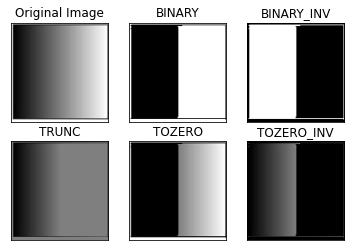

In [10]:

img = cv2.imread('threshold.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],cmap='gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Adaptive Thresholding

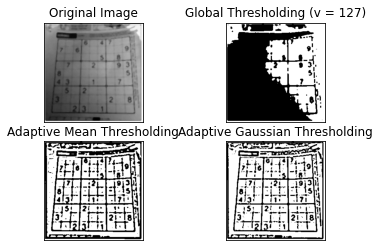

In [11]:
img = cv2.imread('threshold2.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Edge Detection Using OpenCV

In [12]:
# Read the original image
img = cv2.imread('Tiger.jpg')
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)



In [ ]:
# Sobel Edge Detection
Sobel Edge Detection is one of the most widely used algorithms for edge detection. 
The Sobel Operator detects edges that are marked by sudden changes in pixel intensity

In [13]:


sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis

sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)


cv2.destroyAllWindows()

In [ ]:
# Canny Edge Detection
Canny Edge Detection is one of the most popular edge-detection methods in use today because it is so robust and flexible.The algorithm itself follows a three-stage process for extracting edges from an image. Add to it image blurring, a necessary preprocessing step to reduce noise. This makes it a four-stage process, which includes:

Noise Reduction
Calculating Intensity Gradient of the Image
Suppression of False Edges
Hysteresis Thresholding

In [14]:

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Morphological Transformations

In [4]:
img = cv2.imread('letter.jpg',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

In [5]:
cv2.imshow('Erosion.jpg', erosion)

In [6]:
cv2.imwrite('Erosion.jpg', erosion)

True

In [7]:
dilation = cv2.dilate(img,kernel,iterations = 1)

In [8]:
cv2.imwrite('dilation.jpg', dilation)

True

In [9]:
img = cv2.imread('Letter_noise.jpg',0)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

In [8]:
cv2.imwrite('opening.jpg', opening)

True

In [10]:
img = cv2.imread('letter_holes.jpg',0)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

In [11]:
cv2.imwrite('closing.jpg', closing)

True

In [12]:
img = cv2.imread('letter.jpg',0)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

In [13]:
cv2.imwrite('gradient.jpg', gradient)

True

# Structuring Element

In [ ]:
So far, we manually created a structuring element (kernel) in the previous examples with help of Numpy.
It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. 
So for this purpose, OpenCV has a function, cv.getStructuringElement(). 
You just pass the shape and size of the kernel, you get the desired kernel.

In [15]:
# Rectangular Kernel
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))



array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [16]:
# Elliptical Kernel
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [17]:
# Cross-shaped Kernel
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)